Data Visaulization

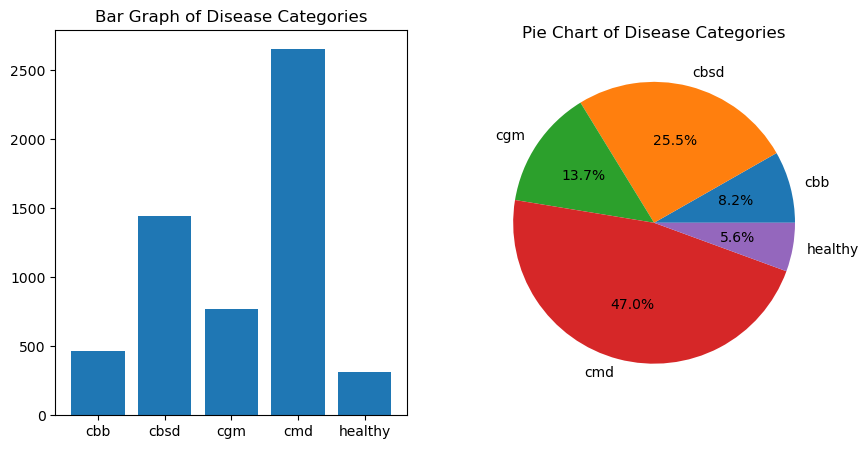

In [ ]:
# Necessary imports
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import LearningRateScheduler

# Data Loading and Preprocessing
data_directory = "C:/Users/Lenovo/PycharmProjects/pythonProject2/Dataset/train/train"  # Replace with the path to your data directory
save_directory = "C:/Users/Lenovo/PycharmProjects/pythonProject2/Dataset/train/save_data_raw"
disease_categories = sorted(os.listdir(data_directory))


images = []
labels = []

for category in disease_categories:
    category_dir = os.path.join(data_directory, category)
    for image_name in os.listdir(category_dir):
        image_path = os.path.join(category_dir, image_name)
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        image = tf.keras.preprocessing.image.img_to_array(image)
        images.append(image)
        labels.append(disease_categories.index(category))


images = np.array(images)
labels = np.array(labels)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Feature Selection (Let's assume we select all features)

# Data Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(disease_categories, np.bincount(labels))
plt.title('Bar Graph of Disease Categories')
plt.subplot(1, 2, 2)
plt.pie(np.bincount(labels), labels=disease_categories, autopct='%1.1f%%')
plt.title('Pie Chart of Disease Categories')
plt.show()

Epoch 1/10
71/71 [==============================] - 228s 3s/step - loss: 24.9375 - accuracy: 0.4465 - val_loss: 1.6181 - val_accuracy: 0.4602 - lr: 9.5000e-04
Epoch 2/10
71/71 [==============================] - 224s 3s/step - loss: 1.3755 - accuracy: 0.4841 - val_loss: 1.3013 - val_accuracy: 0.5009 - lr: 9.5000e-04
Epoch 3/10
71/71 [==============================] - 218s 3s/step - loss: 1.3331 - accuracy: 0.4991 - val_loss: 1.3205 - val_accuracy: 0.5353 - lr: 9.5000e-04
Epoch 4/10
71/71 [==============================] - 204s 3s/step - loss: 1.3268 - accuracy: 0.5053 - val_loss: 1.2988 - val_accuracy: 0.5309 - lr: 9.5000e-04
Epoch 5/10
71/71 [==============================] - 199s 3s/step - loss: 1.2948 - accuracy: 0.5206 - val_loss: 1.4021 - val_accuracy: 0.5186 - lr: 9.5000e-04
Epoch 6/10
71/71 [==============================] - 200s 3s/step - loss: 1.2808 - accuracy: 0.5298 - val_loss: 1.3457 - val_accuracy: 0.5380 - lr: 9.5000e-04
Epoch 7/10
71/71 [==============================] -

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


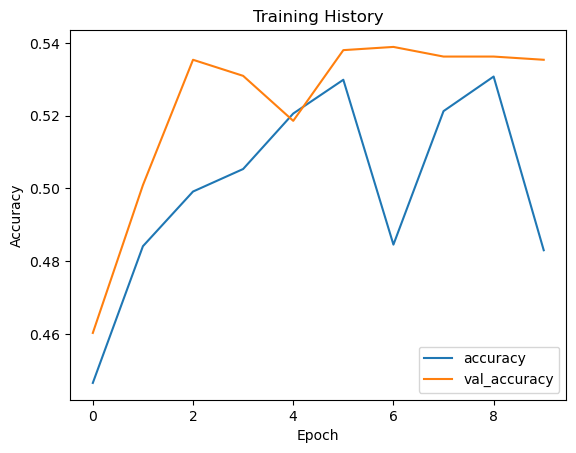

In [ ]:
import os
import numpy as np
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize pixel values to be between 0 and 1
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the loaded labels
loaded_labels = label_encoder.fit_transform(labels)







from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout,Flatten,Dense
from tensorflow.keras.models import Sequential

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(len(set(loaded_labels)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Cyclic Learning Rate - Optional
def cyclic_lr(epoch, lr):
    if epoch % 8 == 0:
        return lr * 0.95
    return lr

lr_scheduler = LearningRateScheduler(cyclic_lr)

# Training the model
# Step 4: Train-Test Split
train_features, test_features, train_labels, test_labels = train_test_split(images, loaded_labels, test_size=0.2, random_state=42)
#history = model.fit(train_features, train_labels, epochs=10, batch_size=64, validation_split=0.2, callbacks=[lr_scheduler])

# Evaluation Metrics
#y_pred = model.predict(test_features)
#y_pred_classes = np.argmax(y_pred, axis=1)

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator on the training data
datagen.fit(train_features)

# Training the model with data augmentation
history = model.fit(
    datagen.flow(train_features, train_labels, batch_size=64),
    epochs=10,
    validation_data=(test_features, test_labels),
    callbacks=[lr_scheduler]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_features, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for test set
y_pred = model.predict(test_features)
y_pred_classes = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import matplotlib.pyplot as plt
print("Classification Report:")
print(classification_report(test_labels, y_pred_classes))
print("Accuracy:", accuracy_score(test_labels, y_pred_classes))
print("Mean Squared Error:", mean_squared_error(test_labels, y_pred_classes))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()


Save the dataset

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf

#Constants
import os
data_directory = "C:/Users/Lenovo/PycharmProjects/pythonProject2/Dataset/train/train"
save_directory = "C:/Users/Lenovo/PycharmProjects/pythonProject2/Dataset/train/save_data_clahe"


disease_categories = sorted(os.listdir(data_directory))

# Function to apply CLAHE to an image
def apply_clahe(image):
    # Convert image to grayscale (assuming it's in RGB format)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

    # Apply CLAHE to the grayscale image
    clahe_image = clahe.apply(gray_image)

    # Convert the CLAHE-enhanced grayscale image back to RGB format
    clahe_image_rgb = cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2RGB)

    return clahe_image_rgb

# Function to load images, apply CLAHE, resize, and convert to numpy arrays
def load_images(data_directory, disease_categories):
    images = []
    labels = []

    # Iterate over each category
    for category in disease_categories:
        category_dir = os.path.join(data_directory, category)
        for image_name in os.listdir(category_dir):
            image_path = os.path.join(category_dir, image_name)

            # Load the image using OpenCV
            image = cv2.imread(image_path)

            # Apply CLAHE to the image
            clahe_image = apply_clahe(image)

            # Resize the CLAHE-enhanced image to the target size
            clahe_image_resized = cv2.resize(clahe_image, (224, 224))

            # Convert the image to a numpy array
            image_array = np.array(clahe_image_resized)

            # Append the image and its label to the lists
            images.append(image_array)
            labels.append(disease_categories.index(category))

    # Convert the lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Example usage:
images, labels = load_images(data_directory, disease_categories)

# Function to save processed data
def save_processed_data(images, labels, save_directory):
    np.save(os.path.join(save_directory, 'images.npy'), images)
    np.save(os.path.join(save_directory, 'labels.npy'), labels)

# Function to load processed data
def load_processed_data(load_directory):
    images = np.load(os.path.join(load_directory, 'images.npy'))
    labels = np.load(os.path.join(load_directory, 'labels.npy'))
    return images, labels


# Step 1: Load and process images
images, labels = load_images(data_directory, disease_categories)

# Step 2: Save processed data
save_processed_data(images, labels, save_directory)


Balanced_DATA

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf

#Constants
import os
data_directory = "C:/Users/Lenovo/PycharmProjects/pythonProject2/Dataset/train/train"
save_directory = "C:/Users/Lenovo/PycharmProjects/pythonProject2/Dataset/train/save_data_clahe"

import os
import cv2
import numpy as np

disease_categories = sorted(os.listdir(data_directory))

# Function to apply CLAHE to an image
def apply_clahe(image):
    # Convert image to grayscale (assuming it's in RGB format)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

    # Apply CLAHE to the grayscale image
    clahe_image = clahe.apply(gray_image)

    # Convert the CLAHE-enhanced grayscale image back to RGB format
    clahe_image_rgb = cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2RGB)

    return clahe_image_rgb

# Function to load images, apply CLAHE, resize, and convert to numpy arrays
def load_images(data_directory, disease_categories):
    images = []
    labels = []

    # Iterate over each category
    for category in disease_categories:
        category_dir = os.path.join(data_directory, category)
        for image_name in os.listdir(category_dir):
            image_path = os.path.join(category_dir, image_name)

            # Load the image using OpenCV
            image = cv2.imread(image_path)

            # Apply CLAHE to the image
            clahe_image = apply_clahe(image)

            # Resize the CLAHE-enhanced image to the target size
            clahe_image_resized = cv2.resize(clahe_image, (224, 224))

            # Convert the image to a numpy array
            image_array = np.array(clahe_image_resized)

            # Append the image and its label to the lists
            images.append(image_array)
            labels.append(disease_categories.index(category))

    # Convert the lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Example usage:
images, labels = load_images(data_directory, disease_categories)

# Function to save processed data
def save_processed_data(images, labels, save_directory):
    np.save(os.path.join(save_directory, 'images.npy'), images)
    np.save(os.path.join(save_directory, 'labels.npy'), labels)

# Function to load processed data
def load_processed_data(load_directory):
    images = np.load(os.path.join(load_directory, 'images.npy'))
    labels = np.load(os.path.join(load_directory, 'labels.npy'))
    return images, labels
image_size=64
# Step 1: Load and process images
images, labels = load_images(data_directory, disease_categories)

# Step 2: Save processed data
save_processed_data(images, labels, save_directory)



In [ ]:
import os
import numpy as np
# Step 3: Load processed data
load_directory = r"C:\Users\Lenovo\PycharmProjects\pythonProject2\Dataset\train\save_data_clahe"
loaded_images = np.load(os.path.join(load_directory, 'images.npy'))
loaded_labels = np.load(os.path.join(load_directory, 'labels.npy'))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the loaded labels
loaded_labels = label_encoder.fit_transform(loaded_labels)







from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout,Flatten,Dense
from tensorflow.keras.models import Sequential

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(len(set(loaded_labels)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Cyclic Learning Rate - Optional
def cyclic_lr(epoch, lr):
    if epoch % 8 == 0:
        return lr * 0.95
    return lr

lr_scheduler = LearningRateScheduler(cyclic_lr)

# Training the model
# Step 4: Train-Test Split
train_features, test_features, train_labels, test_labels = train_test_split(loaded_images, loaded_labels, test_size=0.2, random_state=42)
history = model.fit(train_features, train_labels, epochs=20, batch_size=64, validation_split=0.2, callbacks=[lr_scheduler])

# Evaluation Metrics
y_pred = model.predict(test_features)
y_pred_classes = np.argmax(y_pred, axis=1)

Epoch 1/20
57/57 [==============================] - 130s 2s/step - loss: 53.2918 - accuracy: 0.3990 - val_loss: 1.2905 - val_accuracy: 0.5171 - lr: 9.5000e-04
Epoch 2/20
57/57 [==============================] - 145s 3s/step - loss: 1.3754 - accuracy: 0.4700 - val_loss: 1.3403 - val_accuracy: 0.5215 - lr: 9.5000e-04
Epoch 3/20
57/57 [==============================] - 126s 2s/step - loss: 1.2462 - accuracy: 0.5095 - val_loss: 1.3305 - val_accuracy: 0.5050 - lr: 9.5000e-04
Epoch 4/20
57/57 [==============================] - 126s 2s/step - loss: 1.0759 - accuracy: 0.5811 - val_loss: 1.3171 - val_accuracy: 0.5293 - lr: 9.5000e-04
Epoch 5/20
57/57 [==============================] - 131s 2s/step - loss: 0.8735 - accuracy: 0.6665 - val_loss: 1.4272 - val_accuracy: 0.4972 - lr: 9.5000e-04
Epoch 6/20
57/57 [==============================] - 128s 2s/step - loss: 0.6848 - accuracy: 0.7469 - val_loss: 1.6580 - val_accuracy: 0.5315 - lr: 9.5000e-04
Epoch 7/20
57/57 [==============================] -

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.08      0.12       108
           1       0.39      0.47      0.42       302
           2       0.17      0.12      0.14       147
           3       0.54      0.60      0.57       520
           4       0.14      0.07      0.10        55

    accuracy                           0.43      1132
   macro avg       0.29      0.27      0.27      1132
weighted avg       0.40      0.43      0.41      1132

Accuracy: 0.4284452296819788
Mean Squared Error: 1.8365724381625441


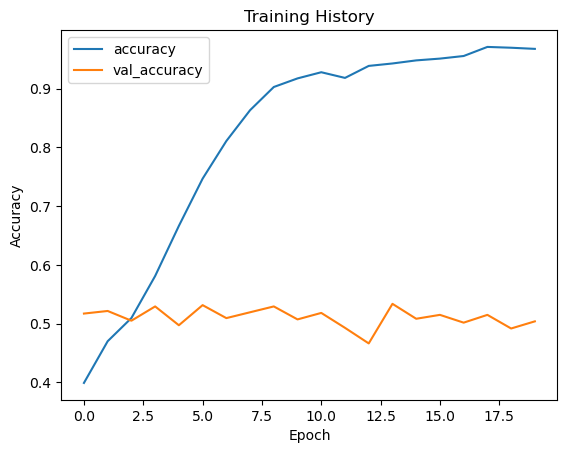

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import matplotlib.pyplot as plt
print("Classification Report:")
print(classification_report(test_labels, y_pred_classes))
print("Accuracy:", accuracy_score(test_labels, y_pred_classes))
print("Mean Squared Error:", mean_squared_error(test_labels, y_pred_classes))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

In [ ]:


# Define the path where you want to save the model
model_path = "C:/Users/Lenovo/PycharmProjects/pythonProject2/Dataset/train/CNNmodel0"
# Save the model to the specified path
model.save(model_path)

print("Model saved successfully at:", model_path)

INFO:tensorflow:Assets written to: C:/Users/Lenovo/PycharmProjects/pythonProject2/Dataset/train/CNNmodel0\assets


INFO:tensorflow:Assets written to: C:/Users/Lenovo/PycharmProjects/pythonProject2/Dataset/train/CNNmodel0\assets


Model saved successfully at: C:/Users/Lenovo/PycharmProjects/pythonProject2/Dataset/train/CNNmodel0


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model(model_path)

print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
# Assuming you have loaded the model as 'loaded_model' and you have test data (x_test, y_test)

# Evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_features, test_labels)

# Print the performance metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

36/36 [==============================] - 7s 190ms/step - loss: 3.1671 - accuracy: 0.4284
Test Loss: 3.1671481132507324
Test Accuracy: 0.4284452199935913


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load the image and preprocess it
def preprocess_image(image_path):
    # Load the image
    image = load_img(image_path, target_size=(224, 224))
    # Convert the image to a numpy array
    image = img_to_array(image)
    # Expand the dimensions to match the input shape expected by the model
    image = np.expand_dims(image, axis=0)
    # Normalize pixel values to be between 0 and 1
    image = image
    return image

# Path to the new image
image_path = "D:/University of Winnipeg/Advanced Machine Learning/Project/train/train/healthy/train-healthy-32.jpg"

# Preprocess the image
image = preprocess_image(image_path)

# Load the trained model
loaded_model = tf.keras.models.load_model("C:/Users/Lenovo/PycharmProjects/pythonProject2/Dataset/train/CNNmodel0")

# Use the model to make predictions
predictions = loaded_model.predict(image)

# Interpret the predictions
predicted_class_index = np.argmax(predictions)
class_labels = [0,1,2,3,4]  # Replace with your class labels
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)
# Display the image
image = cv2.imread(image_path)
#cv2.putText(image, "Predicted Class: " + predicted_class_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
cv2.imshow("Image", image)
cv2.waitKey(5)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 99ms/step
Predicted Class: 1


Epoch 1/10
71/71 [==============================] - 211s 3s/step - loss: 1.5780 - accuracy: 0.3630 - val_loss: 1.3586 - val_accuracy: 0.4585 - lr: 8.1451e-04
Epoch 2/10
71/71 [==============================] - 210s 3s/step - loss: 1.3541 - accuracy: 0.4713 - val_loss: 1.3497 - val_accuracy: 0.4594 - lr: 8.1451e-04
Epoch 3/10
71/71 [==============================] - 215s 3s/step - loss: 1.3520 - accuracy: 0.4721 - val_loss: 1.3493 - val_accuracy: 0.4594 - lr: 8.1451e-04
Epoch 4/10
71/71 [==============================] - 218s 3s/step - loss: 1.3531 - accuracy: 0.4733 - val_loss: 1.3494 - val_accuracy: 0.4594 - lr: 8.1451e-04
Epoch 5/10
71/71 [==============================] - 201s 3s/step - loss: 1.3518 - accuracy: 0.4719 - val_loss: 1.3490 - val_accuracy: 0.4594 - lr: 8.1451e-04
Epoch 6/10
71/71 [==============================] - 200s 3s/step - loss: 1.3509 - accuracy: 0.4724 - val_loss: 1.3492 - val_accuracy: 0.4594 - lr: 8.1451e-04
Epoch 7/10
71/71 [==============================] - 

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


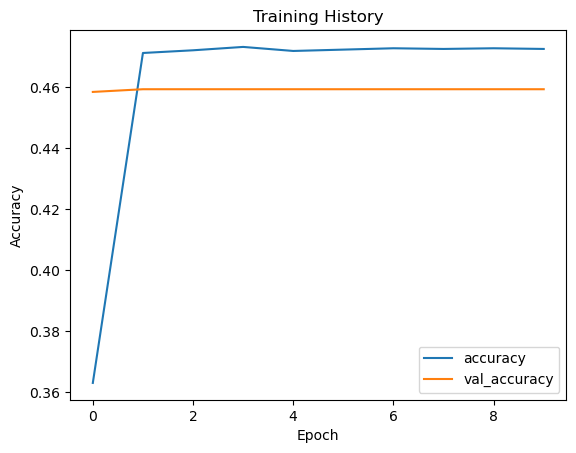

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator on the training data
datagen.fit(train_features)

# Training the model with data augmentation
history = model.fit(
    datagen.flow(train_features, train_labels, batch_size=64),
    epochs=10,
    validation_data=(test_features, test_labels),
    callbacks=[lr_scheduler]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_features, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for test set
y_pred = model.predict(test_features)
y_pred_classes = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import matplotlib.pyplot as plt
print("Classification Report:")
print(classification_report(test_labels, y_pred_classes))
print("Accuracy:", accuracy_score(test_labels, y_pred_classes))
print("Mean Squared Error:", mean_squared_error(test_labels, y_pred_classes))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()



In [ ]:

# Assuming your model is named 'model' and it has been trained

# Define the path where you want to save the model
model_path = "C:/Users/Lenovo/PycharmProjects/pythonProject2/Dataset/train/CNNmodel1"
# Save the model to the specified path
model.save(model_path)

print("Model saved successfully at:", model_path)

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model(model_path)

print("Model loaded successfully.")

In [ ]:
# Assuming you have loaded the model as 'loaded_model' and you have test data (x_test, y_test)

# Evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test)

# Print the performance metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load the image and preprocess it
def preprocess_image(image_path):
    # Load the image
    image = load_img(image_path, target_size=(224, 224))
    # Convert the image to a numpy array
    image = img_to_array(image)
    # Expand the dimensions to match the input shape expected by the model
    image = np.expand_dims(image, axis=0)
    # Normalize pixel values to be between 0 and 1
    image = image
    return image

# Path to the new image
image_path = "D:/University of Winnipeg/Advanced Machine Learning/Project/train/train/healthy/train-healthy-32.jpg"

# Preprocess the image
image = preprocess_image(image_path)

# Load the trained model
loaded_model = tf.keras.models.load_model("C:/Users/Lenovo/PycharmProjects/pythonProject2/Dataset/train/CNNmodel1")

# Use the model to make predictions
predictions = loaded_model.predict(image)

# Interpret the predictions
predicted_class_index = np.argmax(predictions)
class_labels = [0,1,2,3,4]  # Replace with your class labels
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load the trained model
model = load_model("path/to/your/saved_model.h5")

# Define class labels
class_labels = ["0", "1", "2", "3","4"]  # Replace with your class labels

# Capture video from webcam (change the index if using a different camera)
cap = cv2.VideoCapture(0)

# Loop to continuously capture and process frames
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess frame
    frame = cv2.resize(frame, (224, 224))  # Resize frame to match input shape expected by model
    frame = frame / 255.0  # Normalize pixel values
    frame = np.expand_dims(frame, axis=0)  # Add batch dimension

    # Predict class probabilities
    predictions = model.predict(frame)
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the frame along with predicted class label
    cv2.putText(frame, predicted_class_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Real-time Video Classification', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close windows
cap.release()
cv2.destroyAllWindows()

In [ ]:
import os
import numpy as np
# Step 3: Load processed data
load_directory = r"C:\Users\Lenovo\PycharmProjects\pythonProject2\Dataset\train\save_data_clahe"
loaded_images = np.load(os.path.join(load_directory, 'images.npy'))
loaded_labels = np.load(os.path.join(load_directory, 'labels.npy'))

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the loaded labels
loaded_labels = label_encoder.fit_transform(loaded_labels)
train_features, test_features, train_labels, test_labels = train_test_split(loaded_images, loaded_labels, test_size=0.2, random_state=42)


In [ ]:
# Define and train ResNet model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])
resnet_model.trainable = False
resnet_model_output = Sequential([
    resnet_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
resnet_model_output.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet_model_output.fit(train_features, train_labels,epochs=10, batch_size=64, validation_split=0.2)
resnet_loss, resnet_accuracy = resnet_model_output.evaluate(test_features, test_labels)
print("ResNet Model Test Accuracy:", resnet_accuracy)

# Define and train Inception model (similar to ResNet)
# Define and train VGGNet model (similar to ResNet)
# Define and train MobileNet model (similar to ResNet)
# Define and train Xception model (similar to ResNet)

# Evaluate performance of each model
# Print performance metrics

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_features, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for test set
y_pred = model.predict(test_features)
y_pred_classes = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import matplotlib.pyplot as plt
print("Classification Report:")
print(classification_report(test_labels, y_pred_classes))
print("Accuracy:", accuracy_score(test_labels, y_pred_classes))
print("Mean Squared Error:", mean_squared_error(test_labels, y_pred_classes))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()


In [ ]:
# Define the path where you want to save the model
model_path = "C:/Users/Lenovo/PycharmProjects/pythonProject2/Dataset/train/CNNmodel0"
# Save the model to the specified path
model.save(model_path)

print("Model saved successfully at:", model_path)

from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model(model_path)

print("Model loaded successfully.")

# Assuming you have loaded the model as 'loaded_model' and you have test data (x_test, y_test)

# Evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test)

# Print the performance metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)